กำหนดต่า Library Package ที่ต่้องใช้งาน

In [25]:
from pandas_datareader import data as pdr
import pandas as pd
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

กำหนด Function ในการเรียกราคาหุ้นจาก Yahoo Finance

In [2]:
def GetStock(stockname, start, end) :
    return (pdr.get_data_yahoo(stockname, start, end))

In [3]:
symbols = ['TMB.BK','BBL.BK','KBANK.BK','SCB.BK']

เรียกใช้ Function ในการดึงข้อมูลกราฟตามช่วงเวลาที่กำหนดมาแสดง

In [4]:
Dataf1=GetStock(symbols[0],'2016-01-01','2017-06-30')
Dataf2=GetStock(symbols[1],'2016-01-01','2017-06-30')
Dataf3=GetStock(symbols[2],'2016-01-01','2017-06-30')
Dataf4=GetStock(symbols[3],'2016-01-01','2017-06-30')

[*********************100%***********************]  1 of 1 downloaded

ดึงเอาเฉพาะราคาปิดของหุ้นแต่ละตัว

In [13]:
stockA=Dataf1['Close']
stockB=Dataf2['Close']
stockC=Dataf3['Close']
stockD=Dataf4['Close']

รวมราคาปิดของหุ้นแต่ละตัวให้อยู่ใน dataframe เดียว

In [17]:
stockAll= pd.concat([stockA, stockB, stockC, stockD],axis=1,
                    keys=[symbols[0],symbols[1], symbols[2],symbols[3]])

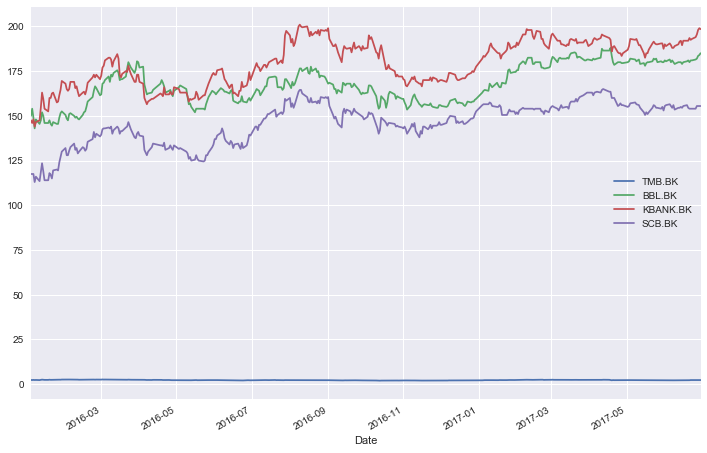

In [30]:
plt.figure(1)
stockAll.plot(figsize=(12,8))

ทำการ normalize data ให้อยู่ในสเกลเดียวกันเพื่อทำการเปรียบเทียบได้

In [39]:
normstockAll=(stockAll/stockAll.ix[0]*100)

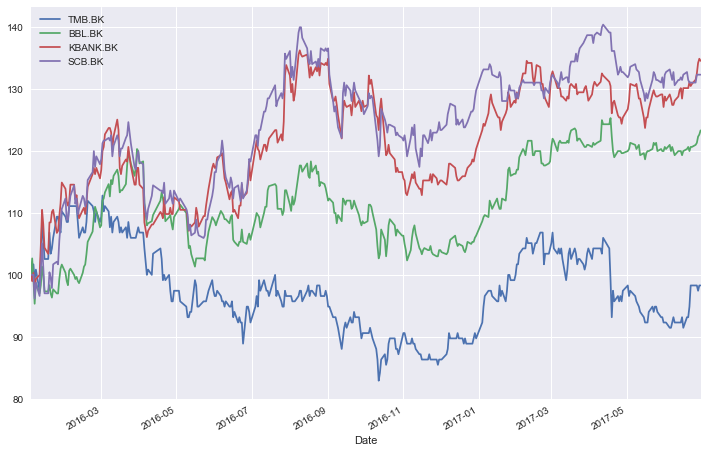

In [46]:
plt.figure(2)
normstockAll.plot(figsize=(12,8))

คำนวนค่า log return เปรียบเทียบแบบ subplot 2,2,x

In [41]:
log_return=np.log(normstockAll / normstockAll.shift(1))

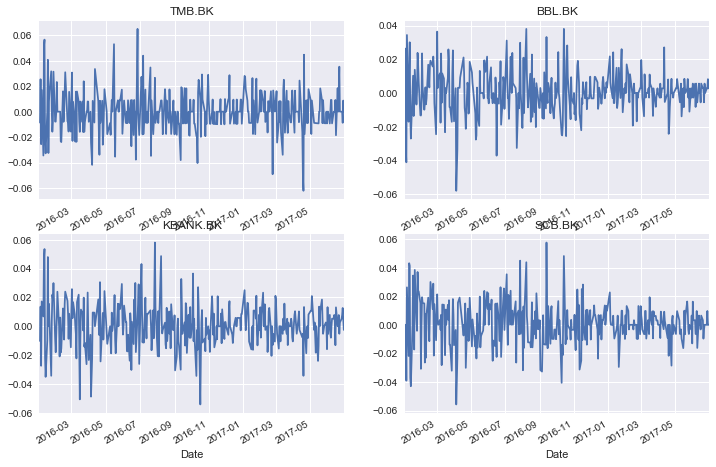

In [64]:
plt.figure(3)
plt.subplot(221)
plt.title(symbols[0])
log_return[symbols[0]].plot(figsize=(12,8))
plt.subplot(222)
plt.title(symbols[1])
log_return[symbols[1]].plot(figsize=(12,8))

plt.subplot(223)
plt.title(symbols[2])
log_return[symbols[2]].plot(figsize=(12,8))
plt.subplot(224)
plt.title(symbols[3])
log_return[symbols[3]].plot(figsize=(12,8))